In [1]:
tract_list = [
    5074,
    5073,
    5072,
    5071,
    5070,
    5069,
    5068,
    5067,
    5066,
    5065,
    4860,
    4859,
    4858,
    4857,
    4856,
    4855,
    4854,
    4853,
    4852,
    4851,
    4850,
    4648,
    4647,
    4646,
    4645,
    4644,
    4643,
    4642,
    4641,
    4640,
    4639,
    4638,
    4637,
    4636,
    4441,
    4440,
    4439,
    4438,
    4437,
    4436,
    4435,
    4434,
    4433,
    4432,
    4431,
    4430,
    4429,
    4236,
    4235,
    4234,
    4233,
    4232,
    4231,
    4230,
    4229,
    4228,
    4227,
    4226,
    4225,
    4224,
    4035,
    4034,
    4033,
    4032,
    4031,
    4030,
    4029,
    4028,
    4027,
    4026,
    4025,
    4024,
    4023,
    3837,
    3836,
    3835,
    3834,
    3833,
    3832,
    3831,
    3830,
    3829,
    3828,
    3827,
    3826,
    3825,
    3643,
    3642,
    3641,
    3640,
    3639,
    3638,
    3637,
    3636,
    3635,
    3634,
    3633,
    3632,
    3631,
    3453,
    3452,
    3451,
    3450,
    3449,
    3448,
    3447,
    3446,
    3445,
    3444,
    3443,
    3442,
    3441,
    3268,
    3267,
    3266,
    3265,
    3264,
    3263,
    3262,
    3261,
    3260,
    3259,
    3258,
    3257,
    3256,
    3086,
    3085,
    3084,
    3083,
    3082,
    3081,
    3080,
    3079,
    3078,
    3077,
    3076,
    3075,
    3074,
    2908,
    2907,
    2906,
    2905,
    2904,
    2903,
    2902,
    2901,
    2900,
    2899,
    2898,
    2897,
    2896,
]

In [2]:
import numpy as np

In [3]:
outpath = "/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/full_dc2_masks_mag_i_truth/"
bins = [0, 10, 11, 12, 13, 14, 15, 16]
result = np.zeros(
    (len(tract_list), len(bins) - 1, 200)
)  # create empty arry to store results
for i, tract in enumerate(tract_list):
    result[i] = np.loadtxt(outpath + f"{tract}_density_ratio.txt")

In [4]:
mean_d = np.mean(result, axis=0)

In [7]:
theta_bins = np.logspace(np.log10(0.5), np.log10(500), 200)
critical_density = 0.9
critical_radius_value = []
for i in range(len(bins) - 1):
    if len(np.where(mean_d[i] >= critical_density)[0]) > 0:
        critical_radius_value.append(
            theta_bins[np.where(mean_d[i] >= critical_density)[0][0]]
        )
    else:
        critical_radius_value.append(np.nan)

In [13]:
a = [0, 3, 5, 4, np.nan]
print(np.nanmean(a))
a = [0, 3, 5, 4]
print(np.mean(a))

3.0
3.0


In [10]:
critical_radius_value

[11.11498241263097,
 11.11498241263097,
 9.210349846633576,
 6.947477471865686,
 5.7569769966322335]

In [11]:
import matplotlib.pyplot as plt

plt.scatter(theta_bins, mean_d[0])
plt.title("0 < i < 17", fontsize=15)
plt.xlabel("$theta$[arcsec]", fontsize=13)
plt.ylabel("density_ratio", fontsize=13)
plt.axvline(11.11, linestyle="--", c="red", label="r_mask = 11.11")
plt.axhline(0.9, linestyle="--", c="black", label="d_crit = 0.9")
plt.xscale("log")


KeyboardInterrupt



In [12]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [13]:
density_table = Table.read(
    "/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/bo_custom_ratio.fits"
)

In [16]:
random_indexes = np.random.randint(0, len(density_table), 10)

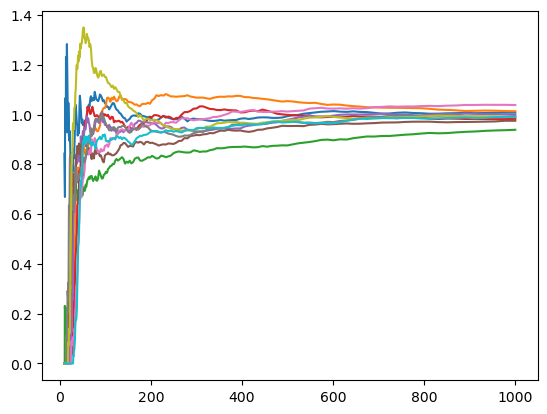

In [25]:
for i in random_indexes:
    plt.plot(
        np.logspace(np.log10(10), np.log10(1000), 200),
        density_table[i]["density_ratio"],
    )

In [26]:
len(density_ratio)

1453

In [32]:
density_ratio = density_table["density_ratio"]

In [33]:
theta_bins = np.logspace(np.log10(10), np.log10(1000), 200)

In [34]:
radius = np.zeros(len(density_ratio))
for i in range(len(density_ratio)):
    radius[i] = theta_bins[np.where(density_ratio[i] >= 0.9)[0][0]]

In [35]:
radius

array([ 52.91978736,  52.91978736,  56.72426068, ..., 615.09857886,
       615.09857886,  54.15871378])

In [37]:
max(radius)

615.0985788580505

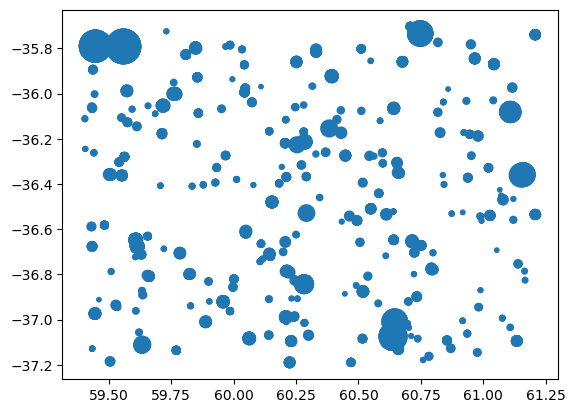

In [36]:
plt.scatter(density_table["ra"], density_table["dec"], s=radius)

In [44]:
np.logspace(np.log10(10), np.log10(1000), 200)

array([  10.        ,   10.23411402,   10.47370898,   10.71891319,
         10.96985798,   11.22667774,   11.48951   ,   11.75849554,
         12.03377841,   12.31550603,   12.6038293 ,   12.89890261,
         13.20088401,   13.50993521,   13.82622174,   14.14991297,
         14.48118228,   14.82020706,   15.16716888,   15.52225357,
         15.88565129,   16.25755666,   16.63816886,   17.02769172,
         17.42633386,   17.83430877,   18.25183494,   18.67913599,
         19.11644075,   19.56398344,   20.02200372,   20.4907469 ,
         20.97046401,   21.46141198,   21.96385372,   22.47805834,
         23.0043012 ,   23.54286414,   24.0940356 ,   24.65811076,
         25.2353917 ,   25.82618761,   26.43081487,   27.0495973 ,
         27.6828663 ,   28.33096102,   28.99422854,   29.67302408,
         30.36771118,   31.07866188,   31.80625693,   32.550886  ,
         33.31294788,   34.0928507 ,   34.89101213,   35.70785965,
         36.54383071,   37.39937302,   38.27494479,   39.17101

In [22]:
critical_radius_value = [
    round(
        theta_bins[np.where(density_ratio[i] >= 0.9)[0]],
        2,
    )
    for i in range(len(density_ratio))
]

TypeError: type numpy.ndarray doesn't define __round__ method

In [15]:
radius = Table.read(
    "/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/bo_custom_ratio_radius.fits"
)

FileNotFoundError: [Errno 2] No such file or directory: '/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/bo_custom_ratio_radius.fits'